In [1]:
import torch
import matplotlib.pyplot as plt
from imageio import imread
import cv2
import numpy as np
# 导入相关包
from utils.data.jacquard_data_t import JacquardDataset
from models.ggcnn2_patch_v4 import GGCNN2 as GGCNN2_patch
from models.ggcnn2 import GGCNN2
from models.common import post_process_output
from utils.dataset_processing import evaluation
from utils.dataset_processing.evaluation import collision_validate
from utils.dataset_processing.grasp import Grasp

In [2]:
def show_grasp(img,grasp,color = (0,255,0),title = 'Show Grasp',dis = True):
    # 给定一张图及一个抓取(Grasps和Grasp类型均可),在图上绘制出抓取框
    gr = grasp
#     print(gr.points.astype(np.uint32))
    # 有时候预测出负值会报错
    try:
        for i in range(3):
            cv2.line(img,tuple(gr.points.astype(np.uint32)[i][::-1]),tuple(gr.points.astype(np.uint32)[i+1][::-1]),color,1)
        cv2.line(img,tuple(gr.points.astype(np.uint32)[3][::-1]),tuple(gr.points.astype(np.uint32)[0][::-1]),color,1)
        cv2.circle(img, (gr.center[1],gr.center[0]), 2, color, 1)
    except Exception as e:
        print(e)
        pass
    if dis:
        plt.figure(figsize=(15,15))
        plt.title(title)
        plt.imshow(img)
        plt.show()

    return img

In [19]:
model_path_patch = '../output/models/211130_2307_/epoch_71_iou_0.86_statedict.pt'
model_path = '../output/raw_ggcnn/211126_1057_/epoch_46_iou_0.90_statedict.pt'
net = GGCNN2(1)
net.load_state_dict(torch.load(model_path))

device = torch.device("cuda:0")

net = net.to(device)

net_patch = GGCNN2_patch(1)
net_patch.load_state_dict(torch.load(model_path_patch))


net_patch = net_patch.to(device)

In [ ]:
dataset = JacquardDataset('../jacquard/',start = 0.95, end = 1.0, random_rotate = False, random_zoom = False, include_depth = True, include_rgb = False)
for idx in range(1000):
    x,y,idx,rot,zoom = dataset.__getitem__(idx)
    x = x.unsqueeze(dim = 0)
    x = x.to(device)
    rgb_img = dataset.get_rgb(idx,rot = 0, zoom=1, normalise = False)
    plt.imshow(rgb_img)
    plt.show()
    pos_img,cos_img,sin_img,width_img = net(x)
    plt.figure(figsize = (15,15))
    plt.subplot(141)
    plt.title('orogin')
    plt.imshow(pos_img.squeeze().cpu().data.numpy())
    plt.subplot(142)
    plt.imshow(cos_img.squeeze().cpu().data.numpy())
    plt.subplot(143)
    plt.imshow(sin_img.squeeze().cpu().data.numpy())
    plt.subplot(144)
    plt.imshow(width_img.squeeze().cpu().data.numpy())
    plt.show()

    pos_img,cos_img,sin_img,width_img,prob,_,_,_ = net_patch(x)
    plt.figure(figsize = (15,15))
    plt.subplot(141)
    plt.title('patch')
    plt.imshow(pos_img.squeeze().cpu().data.numpy())
    plt.subplot(142)
    plt.imshow(cos_img.squeeze().cpu().data.numpy())
    plt.subplot(143)
    plt.imshow(sin_img.squeeze().cpu().data.numpy())
    plt.subplot(144)
    plt.imshow(width_img.squeeze().cpu().data.numpy())
    plt.show()

../jacquard/Jacquard_Dataset_9/dbcd5a88a9d4f1d7579cfe4420588034/2_dbcd5a88a9d4f1d7579cfe4420588034_grasps.txt


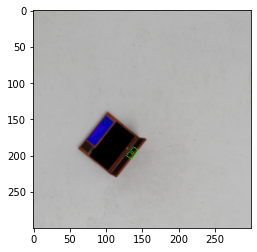

In [17]:
for idx in range(0,1000):
    idx = 2363
    print(dataset.grasp_files[idx])
    rgb_img = dataset.get_rgb(idx,rot = np.pi*1.5, zoom=0.52, normalise = False)
    grs = dataset.get_gtbb(idx,rot = np.pi*1.5, zoom=0.52)
    for gr in grs:
        rgb_img = show_grasp(rgb_img, grasp = gr, dis = 0)
        break
    plt.imshow(rgb_img)
    plt.show()
    break

utils.dataset_processing.grasp.GraspRectangles